Aim of the notebook:
1. Introduce using a metadata file to store parameter values
2. Display tala markings and sitar onsets on the pitch contour and spectrogram respectively
3. Normalizing a pitch contour wrt. a tonic, and displaying notes on the y-axis

1. Import libraries

In [1]:
import json
import sys
sys.path.append('../')
import utils as ul
import librosa
import numpy as np

2. Load file paths and analysis parameters. We will load data from a json file in this example.

In [2]:
f = open('audios/2/metadata.json')
metadata = json.load(f)

In [3]:
print(metadata)

{'min_pitch': 220, 'max_pitch': 880, 'start_time': 1146, 'duration': 15, 'sitar_audio_path': 'audios/2/NIR_ABh_Puriya_Sitar1.wav', 'mix_audio_path': 'audios/2/NIR_ABh_Puriya_StereoMix.wav', 'cycle_file': 'audios/2/NIR_ABh_Puriya_Metre_VilambitTeental.csv', 'onset_file': 'audios/2/NIR_ABh_Puriya_Onsets_Selected_VilambitTeental.csv', 'tonic': 293.66, 'notes': [{'label': 'D_', 'cents': -300}, {'label': 'N_', 'cents': -100}, {'label': 'S', 'cents': 0}, {'label': 'r', 'cents': 100}, {'label': 'G', 'cents': 400}, {'label': 'M', 'cents': 600}, {'label': 'D', 'cents': 900}, {'label': 'N', 'cents': 1100}, {'label': "S'", 'cents': 1200}, {'label': "r'", 'cents': 1300}, {'label': "G'", 'cents': 1600}, {'label': "M'", 'cents': 1800}], 'num_div': 4}


In [4]:
sitar_audio_path = metadata['sitar_audio_path']
mix_audio_path = metadata['mix_audio_path']
cycle_file = metadata['cycle_file']
onset_file = metadata['onset_file']

In [5]:
min_pitch = metadata['min_pitch']
max_pitch = metadata['max_pitch']
start_time = metadata['start_time']
duration = metadata['duration']
tonic = metadata['tonic']
notes = metadata['notes']
num_div = metadata['num_div']
fs = 16000
win_dur = 40e-3
hop_dur = 10e-3
win_size = int(np.ceil(win_dur*fs))
hop_size = int(np.ceil(hop_dur*fs))
n_fft = int(2**(np.ceil(np.log2(win_size))))

3. Load and play audio

In [6]:
x_sitar, _ = librosa.load(sitar_audio_path, offset=start_time, duration=duration, sr=fs)
x_mix, _ = librosa.load(mix_audio_path, offset=start_time, duration=duration, sr=fs)

In [7]:
ul.playAudio(x_sitar, sr=fs)

In [8]:
ul.playAudio(x_mix, sr=fs)

4. Load pitch contour and spectrogram

pitch contour creation - since a tonic is given, the pitch contour is returned in cents
    

In [9]:
pitch, time = ul.pitchContour(audio=x_sitar, sr=fs, minPitch=min_pitch, maxPitch=max_pitch, tonic=tonic, startTime=start_time)
f,t,X = ul.spectrogram(audio=x_sitar, sr=fs, winSize=win_size, hopSize=hop_size, nFFT=n_fft, startTime=start_time)

5. Plot the waveform, pitch contour and spectrogram

Meaning of new parameters used here:
1. Plotting the notes on the y-axis: since a value is given to the notes parameter in plotPitch, the note labels are plotted on the y-axis
2. Adding annotate=True in both plotPitch and plotSpectrogram functions implies that we are adding annotations to these two plots
3. cyclePath parameter given in plotPitch - refers to an annotation file with tala related annotations. Here it displays beat #1 in the pitch contour plot. The dotted lines are computed divisions between 2 annotated beats (described further below).
4. numDiv in plotPitch - defines the number of divisions to add between 2 beats in the plot. These divisions are seen as dotted lines as opposed to the solid lines used for the provided annotations.
5. onsetFile parameter in plotSpectrogram - refers to the annotation file with performance related onsets. In this case it refers to the Sitar onsets that are marked in the csv file.

TypeError: utils.drawAnnotation() got multiple values for keyword argument 'startTime'

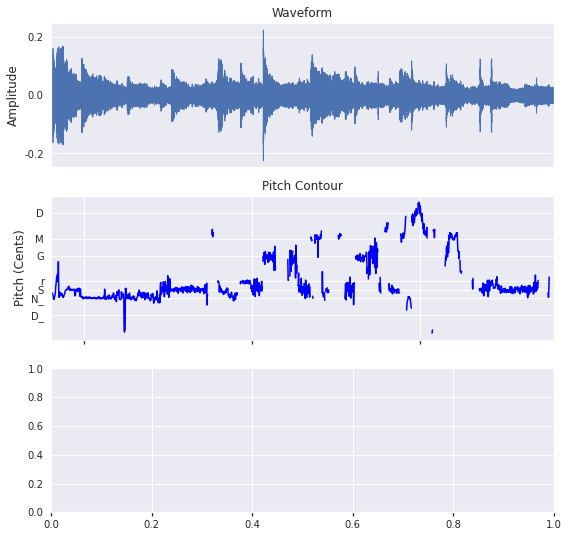

In [10]:
n_subplots=3
fig, ax = ul.generateFig(n_subplots,(9, 9), [1]*n_subplots)

ul.drawWave(audio=x_mix, ax=ax[0])
ul.plotPitch(pitch, time, is_cents=True, startTime=start_time, duration=duration, notes=notes, annotate=True, 
             cyclePath = cycle_file, numDiv=num_div, ax=ax[1])
ul.plotSpectrogram(X,t,f, annotate=True, onsetPath = onset_file, startTime=start_time, xticks=True, 
                   xlabel=True, ax=ax[2])